<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: 0; padding: 30px; font-size: 22px; ">ANALYSE DES COMPORTEMENT CLIENTS EN LIGNE LIBRAIRIES LAPAGE</h1>
</div>

### OBJECTIF DE CE NOTEBOOK

Analyser les différents les différents comportements  d'achats des clients en fonction de l'âge et du genre.

Cette analyse permettra d'établir si les montants et les fréquences d'achats, la taille du panier moyens ou encore  la catégories des produits achetés sont en lien avec l'âge et le genre des clients.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [172]:
#Importation de la librairie Pandas
import pandas as pd

In [173]:
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt

In [174]:
#Importation de la librairie numpy
import numpy as np

In [175]:
#Importation de la librairie Seaborn
import seaborn as sns

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichier</h3>
</div>

In [177]:
#Importation du fichier .pkl
df_sans_btob = pd.read_pickle("df_sans_btob.pkl")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du fichier df_sans_btob.csv</h2>
</div>

In [179]:
#Consulter le nombre de colonnes , La nature des données dans chacune des colonnes, et le nombre de valeurs présentes dans chacune des colonnes
df_sans_btob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640734 entries, 649814 to 661195
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   client_id        640734 non-null  object        
 1   sex              640734 non-null  object        
 2   birth            640734 non-null  float64       
 3   id_prod          640734 non-null  object        
 4   date             640734 non-null  datetime64[ns]
 5   session_id       640734 non-null  object        
 6   price            640734 non-null  float64       
 7   categ            640734 non-null  int32         
 8   année_mois_jour  640734 non-null  datetime64[ns]
 9   année_mois       640734 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(5)
memory usage: 51.3+ MB


In [180]:
#Conversion des valeurs de la colonne birth en entier
df_sans_btob['birth'] = df_sans_btob['birth'].astype(int)

In [181]:
#Afficher les 5 premières lignes de la table df_sans_btob
df_sans_btob.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,année_mois_jour,année_mois
649814,c_5479,f,1971,1_91,2021-03-01 00:33:24.571129,s_14,20.99,1,2021-03-01,2021-03
322188,c_6536,m,1987,0_177,2021-03-01 08:10:44.374230,s_169,19.99,0,2021-03-01,2021-03
118430,c_4161,m,1979,0_1355,2021-03-01 06:28:07.853369,s_141,18.99,0,2021-03-01,2021-03
649074,c_3474,m,1975,1_85,2021-03-01 08:53:12.665489,s_183,22.99,1,2021-03-01,2021-03
456094,c_7403,f,1970,1_286,2021-03-01 11:29:50.353462,s_237,29.44,1,2021-03-01,2021-03


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des comportements clients</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Lien entre le genre des clients et les catégories de livres achetés</h3>
</div>

### **HYPOTHESES:**

**H0 :**  *La catégorie de livre acheté et le genre du client sont indépendant.*

**H1 :** *La catégorie du livre acheté et le genre du client ont une dépendance l'un envers l'autre.*

### **TYPES DE VARIABLES:**

**Genre du client :**  *Qualitative.*

**Catégorie du livre acheté:** *Qualitative*

### **Test du chi carré d'indépendance des variables genres et catégories de livres:**

*On utilise la méthode du Chi2 pour tester l'indépendance des deux variables quand celles-ci sont qualitatives.*

**1. Réalisation d'un tableau de contigence.**

In [188]:
tableau_contingence = pd.crosstab(df_sans_btob['sex'], df_sans_btob['categ'])
tableau_contingence

categ,0,1,2
sex,,,
f,200793,115721,16980
m,186488,104884,15868


*Le tableau de contigence nous donne la répartition des achats en fonction de la catégorie du livre et du genre du client.*

**2. Représentation graphique des données.**

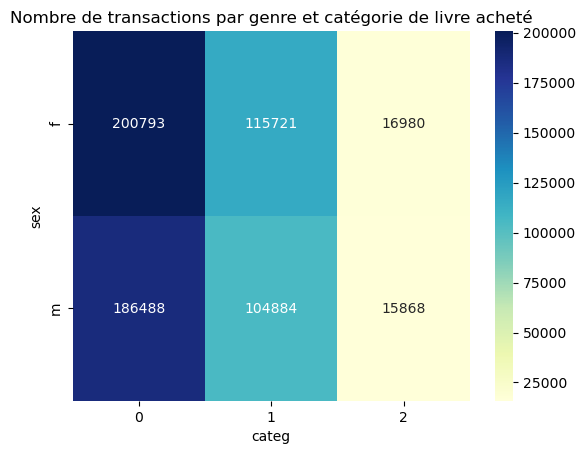

In [191]:
# Convertir les valeurs en chaînes entières pour annotation
annot = tableau_contingence.astype(int).astype(str)
#Réalisation de la Heatmap
sns.heatmap(tableau_contingence, annot=annot, fmt='', cmap='YlGnBu')
plt.title("Nombre de transactions par genre et catégorie de livre acheté")
plt.show()

**3. Test du Chi2.**

In [193]:
#Importation de la fonction chi2_contingency depuis la librairie scipy.stats
from scipy.stats import chi2_contingency
#on applique le test du chi carré  d'indépendance sur le tableau de contingence
chi2, p_value, dof, expected = chi2_contingency(tableau_contingence)
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi2 statistic: 22.66856665178056
P-value: 1.1955928116587024e-05
Degrees of freedom: 2
Expected frequencies:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


* Le résultat du test chi2 nous permet de **rejetter l'hypothèse H0** qui indiquait que le genre des clients et la catégorie de livre acheté sont indépendant.
* La **P_value faible** indique que l'association entre genre des clients et catégorie de livre acheté n'est probablement pas du au hasard .
* Pour évaluer la force de cette relation, il faut continuer à approfondir notre analyse.

### **Calcul du coefficient V de Cramer: Force du lien entre genre et catégorie de livres:**

*On utilise la méthode du coefficient V de Cramer pour établir la force du lien entre le genre des clients et les catégories de livres achetés.*

In [197]:
#Calcul du nombre total d'observations
n = tableau_contingence.values.sum()
#determination de la plus petite dimension du tableau
min_dim = min(tableau_contingence.shape) - 1
#Calcul du coefficient V de cramer
v_cramer = np.sqrt(chi2 / (n * min_dim))
#Affichage du résultat
print(f"V de Cramer : {v_cramer}")

V de Cramer : 0.005948029928802536


*Le coefficient V de Cramer, qui mesure la force l'association entre genre des clients et catégorie de livres acheté, est très faible (V = 0,006), indiquant que cette relation est quasi-nulle en pratique.*

*Ainsi, malgré une significativité statistique, le genre explique très peu les différences de choix de catégorie de livres.*

### **Réprésentation graphiques du lien genres / Catégories de livres achetés via une heatmap des corrélations des résidus standardisés**

*La méthode des résidus standardisés permet d’analyser plus finement un tableau de contingence en identifiant où les effectifs observés diffèrent significativement des effectifs attendus sous l’hypothèse d’indépendance.*

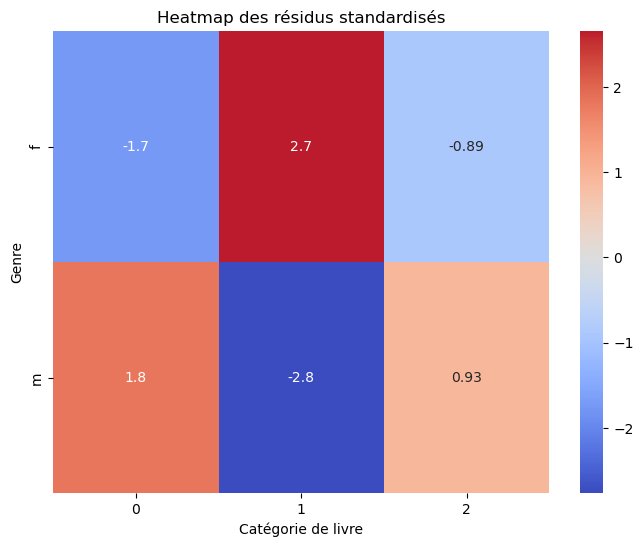

In [201]:
observed = tableau_contingence.values
residus = (observed - expected) / np.sqrt(expected)
# Visualisation avec une heatmap
plt.figure(figsize=(8,6))
sns.heatmap(residus, annot=True, cmap="coolwarm", center=0,
            xticklabels=tableau_contingence.columns,
            yticklabels=tableau_contingence.index)
plt.title("Heatmap des résidus standardisés")
plt.xlabel("Catégorie de livre")
plt.ylabel("Genre")
plt.show()

*Ce test permet de vérifier s’il existe une relation significative entre l’âge des clients et le type de livre acheté.*

**Bleu = valeur négative =** moins de clients que prévu

**Rouge = valeur positive =** plus de clients que prévu

*Plus la valeur est forte, plus la différence est significative.*

### **Analyses**

**Femmes (F)**
* Categ 0 : -1.7 → sous-représentation modérée
* Categ 1 : 2.7 → sur-représentation forte
* Categ 2 : -0.89 → légère sous-représentation

**Hommes (M)**
* Categ 0 : 1.8 → sur-représentation modérée
* Categ 1 : -2.8 → sous-représentation forte
* Categ 2 : 0.93 → légère sur-représentation

### **Interprétation**

* La catégorie 1 est nettement préférée par les femmes (résidu positif important) et moins par les hommes (résidu négatif important), suggérant une différence marquée dans cette catégorie.

* La catégorie 0 semble préférée par les hommes (résidu positif) et moins par les femmes (résidu négatif).

* La catégorie 2 est assez équilibrée, avec des résidus proches de zéro pour les deux genres.

## **Conclusion :**
*Le genre présente une influence détectable mais négligeable sur le type de livres achetés par les clients.*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Lien entre l'âge des clients et le montant total de leurs achats.</h3>
</div>

### **HYPOTHESES:**
**H0 :** Le montant total d'achat et l'âge du client sont indépendant.

**H1 :** Le montant total d'achat et l'âge du client ont une dépendance l'un envers l'autre.

### **TYPES DE VARIABLES:**
**Montant total d'achats par client:** *Quantitative*

**Age des clients:** *Quantitative*

### **PREPARATION DES DONNEES**

**Agrégation des données**

In [209]:
from datetime import datetime
# Agréger par client en sommant les prix des transactions et en conservant l'année de naissance
df_agg = df_sans_btob.groupby('client_id').agg({
    'price': 'sum',
    'birth': 'first'  # prend la première année de naissance trouvée par client
}).reset_index()
# Calculer l'âge en prenant comme référence l'année la plus récente (2023)
annee_reference = 2023
df_agg['age'] = annee_reference - df_agg['birth']
# Afficher un extrait pour vérification
df_agg

,client_id,price,birth,age
0,c_1,629.02,1955,68
1,c_10,1353.60,1956,67
2,c_100,254.85,1992,31
3,c_1000,2291.88,1966,57
4,c_1001,1823.85,1982,41
...,...,...,...,...
8591,c_995,189.41,1955,68
8592,c_996,1637.34,1970,53
8593,c_997,1490.01,1994,29
8594,c_998,2822.22,2001,22


### **LA DISTRIBUTION DES DONNEES**

**Representation de la distribution de l'age des clients et du montants des achats**

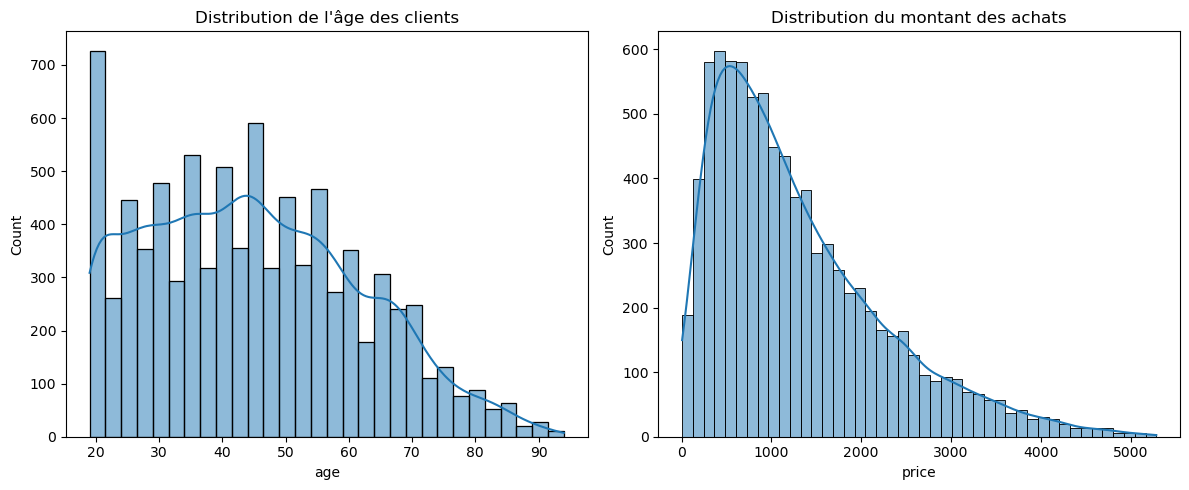

In [212]:
#1.Age des clients
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_agg['age'], kde=True)
plt.title("Distribution de l'âge des clients")
#2.Montant des achats
plt.subplot(1, 2, 2)
sns.histplot(df_agg['price'], kde=True)
plt.title("Distribution du montant des achats")
plt.tight_layout()
plt.show()

**Test de normalité de Shapiro-Wilk**

*Ce test permet de vérifier l'hypothèse de normalité ou non de la distribution des données*

In [215]:
from scipy.stats import shapiro
stat_age, p_age = shapiro(df_agg['age'])
stat_price, p_price = shapiro(df_agg['price'])
print(f"Test Shapiro-Wilk âge : stat={stat_age:.3f}, p={p_age:.3f}")
print(f"Test Shapiro-Wilk montant des achats : stat={stat_price:.3f}, p={p_price:.3f}")

Test Shapiro-Wilk âge : stat=0.970, p=0.000
Test Shapiro-Wilk montant des achats : stat=0.904, p=0.000


C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


**La distribution de l'âge des clients et du montant total des achats réalisés par clients**

*Le test de Shapiro-Wilk même si il est ici pratiqué sur un échantillon > à 5000 , vient confirmer que les distributions de l'age et du montant total des achats des clients représentées sur les 2 histogrammes  n'observent pas la loi normale.*

*De ce fait, il faut utiliser une méthode statistique non paramétrique pour la suite de l'analyse.*

### **Représentation du montant total des achats en fonction de l'âge des clients**

**Réalisation d'un nuage de point montrant le total des achats en fonction de l'âge des clients ainsi que la tendance**

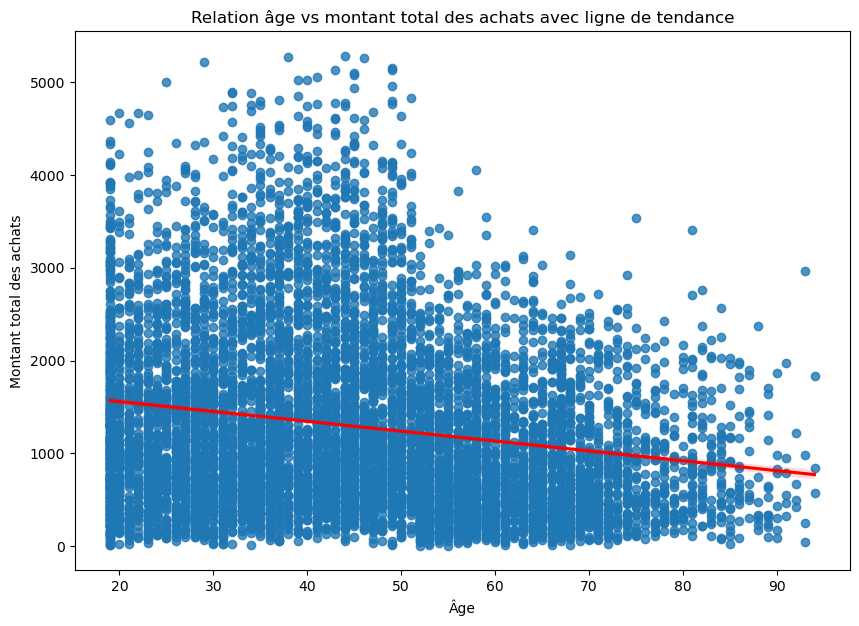

In [219]:
plt.figure(figsize=(10,7))
sns.regplot(data=df_agg, x='age', y='price', line_kws={'color':'red'})
plt.title("Relation âge vs montant total des achats avec ligne de tendance")
plt.xlabel("Âge")
plt.ylabel("Montant total des achats")
plt.show()

*On observe  grâce à la régression linéaire que le montant d'achat total moyen a tendance à diminuer plus l'âge des clients est important.* 

### **La corrélation de Spearman**

*La distribution des données n'étant pas normale on utilise la corrélation de Spearman pour établir le lien entre les valeurs quantitatives des montants totaux d'achats et de l'âge des clients.*

In [223]:
#Test de Spearman
#importation de la fonction nécessaire à la réalisation du test de Spearman
from scipy.stats import spearmanr
corr_spearman, p_value_spearman = spearmanr(df_agg['age'], df_agg['price'])
print(f"Coefficient de Spearman : {corr_spearman:.3f}")
print(f"P-value : {p_value_spearman:.3f}")

Coefficient de Spearman : -0.185
P-value : 0.000


**Coefficient de Spearman(-0,185)**

La détermination du coefficient de spearman rejette H0 (indépendance).

Il indique une corrélation monotone négative faible entre l’âge des clients et le montant des achats.

A mesure que l’âge augmente, le montant des achats a tendance à diminuer légèrement.

**P-value (0,000)**

Cette valeur très faible montre que cette corrélation est statistiquement significative, c’est-à-dire qu’il est extrêmement improbable que cette relation apparaisse par hasard dans l'échantillon.

### **Conclusion:**
 
*Bien que les analyses statistiques révèlent une corrélation négative significative entre l’âge des clients et le montant de leurs achats, cette relation reste faible en intensité.* 

*Autrement dit, lorsque  l’âge des clients augmente, le montant total des achats tend à diminuer, mais cet effet est modeste.*

*Ainsi, l’âge constitue un facteur associé aux montants d’achat, mais il n’explique qu’une part limitée de leur variation. D’autres variables ou critères peuvent jouer un rôle plus important dans la détermination du montant des achats.*



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Lien entre l'âge des clients et la fréquence d'achat.</h3>
</div>

### **HYPOTHESES:**
**H0 :** La fréquence d'achat et l'âge du client sont indépendant.

**H1 :** La fréquence d'achat et l'âge du client ont une dépendance l'un envers l'autre.

### **TYPES DE VARIABLES:**

**Age des clients :**  *Quantitative.*

**Fréquence d'achat:** *Quantitative*

In [229]:
# Calcul du nombre de sessions distinctes par client
freq_achat = df_sans_btob.groupby('client_id')['session_id'].nunique().reset_index()
freq_achat.rename(columns={'session_id': 'frequence_achat'}, inplace=True)
# Récupéraation de  l'année de naissance
birth = df_sans_btob.groupby('client_id')['birth'].first().reset_index()
# Fusion fréquence et année de naissance
df_freq = freq_achat.merge(birth, on='client_id')
# Calcul de l'âge (année de référence 2023)
annee_reference = 2023
df_freq['age'] = annee_reference - df_freq['birth']
df_freq

,client_id,frequence_achat,birth,age
0,c_1,34,1955,68
1,c_10,34,1956,67
2,c_100,5,1992,31
3,c_1000,94,1966,57
4,c_1001,47,1982,41
...,...,...,...,...
8591,c_995,9,1955,68
8592,c_996,80,1970,53
8593,c_997,24,1994,29
8594,c_998,24,2001,22


### **LA DISTRIBUTION DES DONNEES**

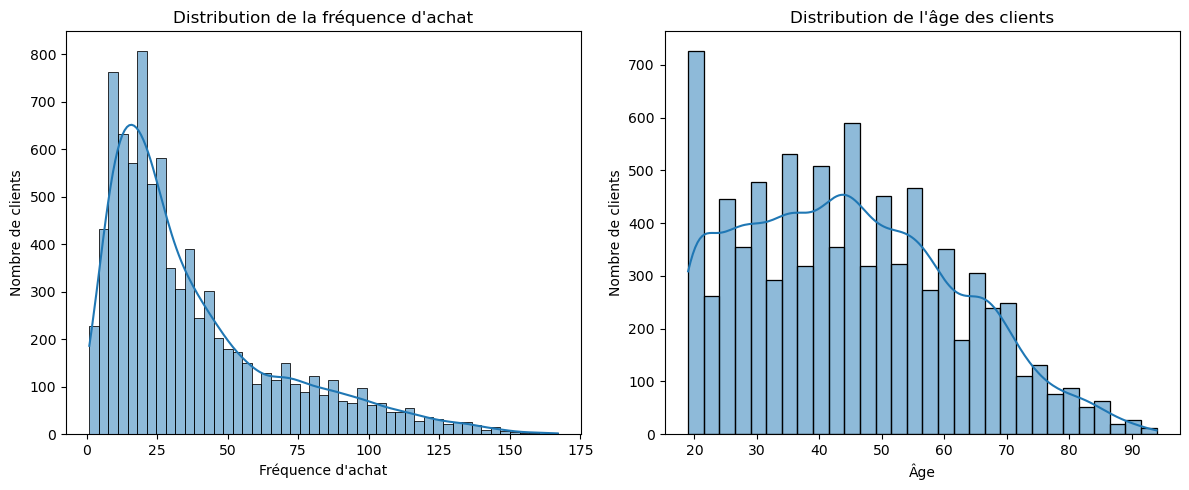

In [231]:
plt.figure(figsize=(12, 5))
# Histogramme de la fréquence d'achat
plt.subplot(1, 2, 1)
sns.histplot(df_freq['frequence_achat'], kde=True)
plt.title("Distribution de la fréquence d'achat")
plt.xlabel("Fréquence d'achat")
plt.ylabel("Nombre de clients")
# Histogramme de l'âge
plt.subplot(1, 2, 2)
sns.histplot(df_freq['age'], kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.tight_layout()
plt.show()

**Test de normalité de Shapiro-Wilk**

In [233]:
stat_freq, p_freq = shapiro(df_freq['frequence_achat'])
stat_age, p_age = shapiro(df_freq['age'])

print(f"Test Shapiro-Wilk fréquence d'achat : stat={stat_freq:.3f}, p={p_freq:.3f}")
print(f"Test Shapiro-Wilk âge : stat={stat_age:.3f}, p={p_age:.3f}")

Test Shapiro-Wilk fréquence d'achat : stat=0.857, p=0.000
Test Shapiro-Wilk âge : stat=0.970, p=0.000


C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


**La distribution de l'âge des clients et la fréquence des achats réalisés par clients**

*Le test de Shapiro-Wilk même si il est ici pratiqué sur un échantillon > à 5000 , vient confirmer que la distribution de l'age et des fréquences d'achats des clients représentées sur les 2 histogrammes  n'observent pas la loi normale.*

*De ce fait, il faut utiliser une méthode statistique non paramétrique pour la suite de l'analyse.*

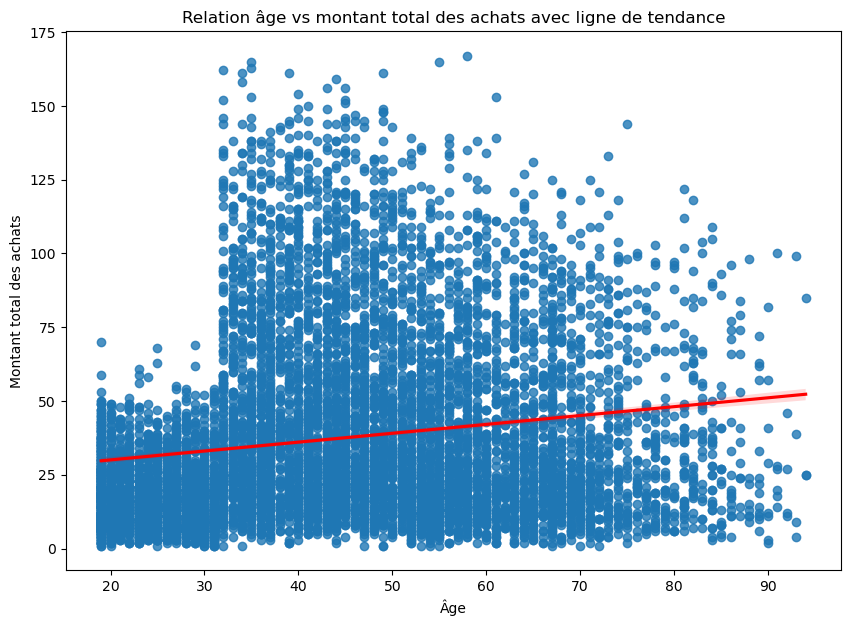

In [235]:
plt.figure(figsize=(10,7))
sns.regplot(data=df_freq, x='age', y='frequence_achat', line_kws={'color':'red'})
plt.title("Relation âge vs montant total des achats avec ligne de tendance")
plt.xlabel("Âge")
plt.ylabel("Montant total des achats")
plt.show()

### **CREATION DE CATEGORIES D'AGE:**

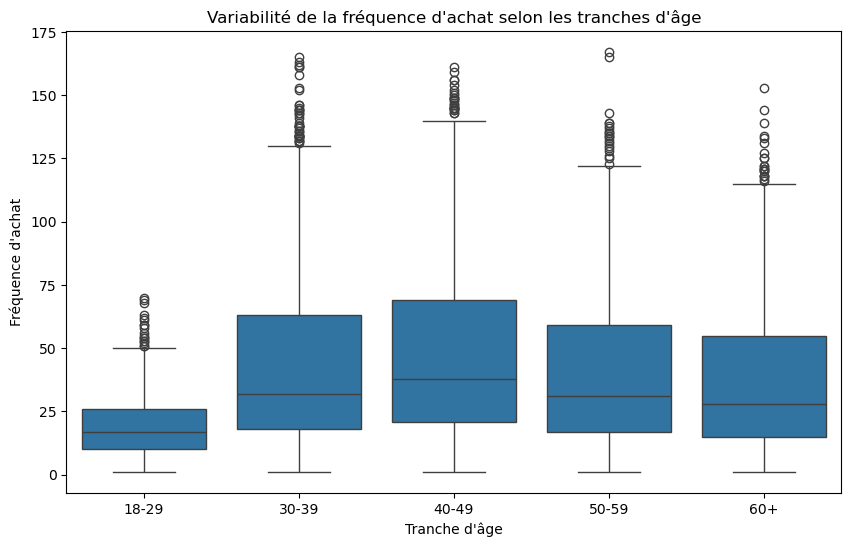

In [237]:
#Création de groupe d'age
bins = [18, 29, 39, 49, 59, 150]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df_freq['age_group'] = pd.cut(df_freq['age'], bins=bins, labels=labels, right=True, include_lowest=True)
#Réalisation d'un box plot de la fréquence d'achat en fonction des catégorie d'âge
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='frequence_achat', data=df_freq)
plt.title("Variabilité de la fréquence d'achat selon les tranches d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence d'achat")
plt.show()

### **Test de Kruskal-Wallis**

*Le test de Kruskal_wallis permet de comparer les distributions d'une variable quantitative entre plusieurs groupes sans prendre en compte l'hypothèse d'une distribution normale.*

In [240]:
#Extraction de la frequence d'achat de chaque groupe
groups = [df_freq.loc[df_freq['age_group'] == grp, 'frequence_achat'].values for grp in labels]

In [241]:
#Réalisation du test de Kruskal-Wallis
from scipy.stats import kruskal
stat, p_value = kruskal(*groups)
print(f"Statistique de Kruskal-Wallis : {stat:.3f}")
print(f"P-value : {p_value:.3f}")

Statistique de Kruskal-Wallis : 1120.478
P-value : 0.000


**Statistique de Kruskal-Wallis (1120.478)**
**P-value (0,000)**

*Le Test de kruskal_wallis **rejette H0** (indépendance).*

*Il existe une différence statistique significative faible entre au moins deux tranches d’âge en ce qui concerne la fréquence d'achat.*

*Il y a donc un lien entre l'âge du client et la frequence des achats réalisés.*

### **Identifier l'existence ou non de  différences entre les groupes (Test post-hoc de Dunn)**

In [244]:
#Installation  du package scikit_posthocs
!pip install scikit-posthocs

In [245]:
# Importation de la fonction nécessaire pour les test post-hocs de Dunn
import scikit_posthocs as sp
# Test de Dunn avec correction de Bonferroni
posthoc = sp.posthoc_dunn(df_freq, val_col='frequence_achat', group_col='age_group', p_adjust='bonferroni')
print(posthoc)

               18-29          30-39          40-49          50-59  \
18-29   1.000000e+00  3.382633e-131  7.442950e-206  9.324728e-112   
30-39  3.382633e-131   1.000000e+00   8.242644e-07   1.000000e+00   
40-49  7.442950e-206   8.242644e-07   1.000000e+00   5.207188e-10   
50-59  9.324728e-112   1.000000e+00   5.207188e-10   1.000000e+00   
60+     6.222308e-93   1.858377e-04   5.846942e-22   4.097556e-02   

                60+  
18-29  6.222308e-93  
30-39  1.858377e-04  
40-49  5.846942e-22  
50-59  4.097556e-02  
60+    1.000000e+00  


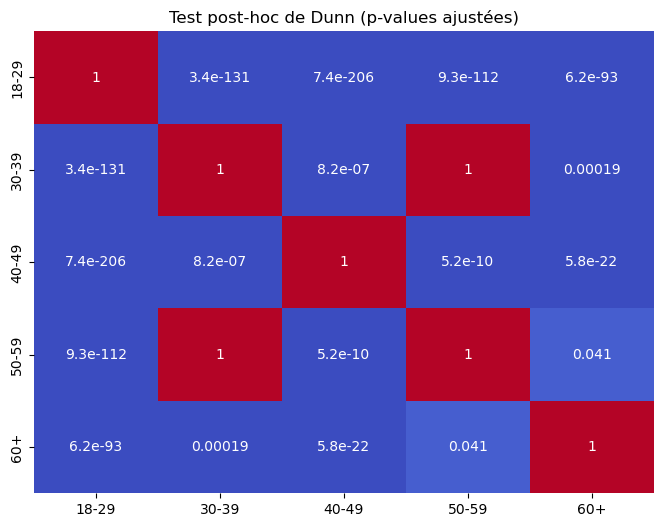

In [246]:
# Afficher la matrice des p-values sous forme de heatmap
plt.figure(figsize=(8,6))
sns.heatmap(posthoc, annot=True, cmap='coolwarm', cbar=False)
plt.title("Test post-hoc de Dunn (p-values ajustées)")
plt.show()

**Interprétation des comparaisons multiples entre tranches d’âge sur la fréquence d’achat**

*Le test post-hoc de Dunn a permis de comparer la fréquence d’achat entre toutes les paires de tranches d’âge, avec correction des p-values pour contrôler le risque d’erreur.*

Les p-values proches de 0 (par exemple, entre 18-29 et 30-39 : 3.38e-131) indiquent une différence hautement significative dans la fréquence d’achat entre ces groupes. Ces deux tranches ont donc un comportement d’achat différent.

Plusieurs comparaisons montrent également des p-values très faibles (par exemple entre 18-29 et 40-49, ou entre 40-49 et 60+), confirmant que ces tranches d’âge ont des fréquences d’achat statistiquement distinctes.

En revanche, certaines p-values sont proches ou égales à 1 (comme entre 30-39 et 50-59), ce qui signifie qu’aucune différence statistiquement significative n’a été détectée entre ces groupes.

La seule p-value un peu limite est celle entre 50-59 et 60+ (environ 0.041), représentant une différence statistiquement significative mais plus modérée.



### **Conclusion:**
 
*La fréquence d'achat varie significativement selon les tranches d'âge.*

*Certaines tranches diffèrent clairement entre elles, tandis que d'autres présentent des comportements similaires.*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Lien entre l'âge des clients et la taille du panier moyen.</h3>
</div>

### **HYPOTHESES:**
**H0 :** L'âge du client et la taille du panier moyen sont indépendants.

**H1 :**  L'âge du client et la taille du panier moyen ont une dépendance l'un envers l'autre.

### **TYPES DE VARIABLES:**

**Age des clients :**  *Quantitative.*

**Taille du panier moyen:** *Quantitative*

In [252]:
#Détermination du panier moyen par client
#Panier par session et par client
panier_par_session = df_sans_btob.groupby(['client_id', 'session_id']).agg({
    'price': 'sum',
    'birth': 'first'  # garder la première année de naissance rencontrée dans la session
}).reset_index()
#Panier moyen par client
panier_moyen_par_client = panier_par_session.groupby('client_id').agg({
    'price': 'mean',
    'birth': 'first'
}).reset_index()
panier_moyen_par_client.rename(columns={'price': 'panier_moyen'}, inplace=True)

In [253]:
#Défintion de l'âge des clients
annee_reference = 2023
panier_moyen_par_client['age'] = annee_reference - panier_moyen_par_client['birth']
panier_moyen_par_client.drop(columns=['birth'], inplace=True)
panier_moyen_par_client

,client_id,panier_moyen,age
0,c_1,18.500588,68
1,c_10,39.811765,67
2,c_100,50.970000,31
3,c_1000,24.381702,57
4,c_1001,38.805319,41
...,...,...,...
8591,c_995,21.045556,68
8592,c_996,20.466750,53
8593,c_997,62.083750,29
8594,c_998,117.592500,22


### **LA DISTRIBUTION DES DONNEES**

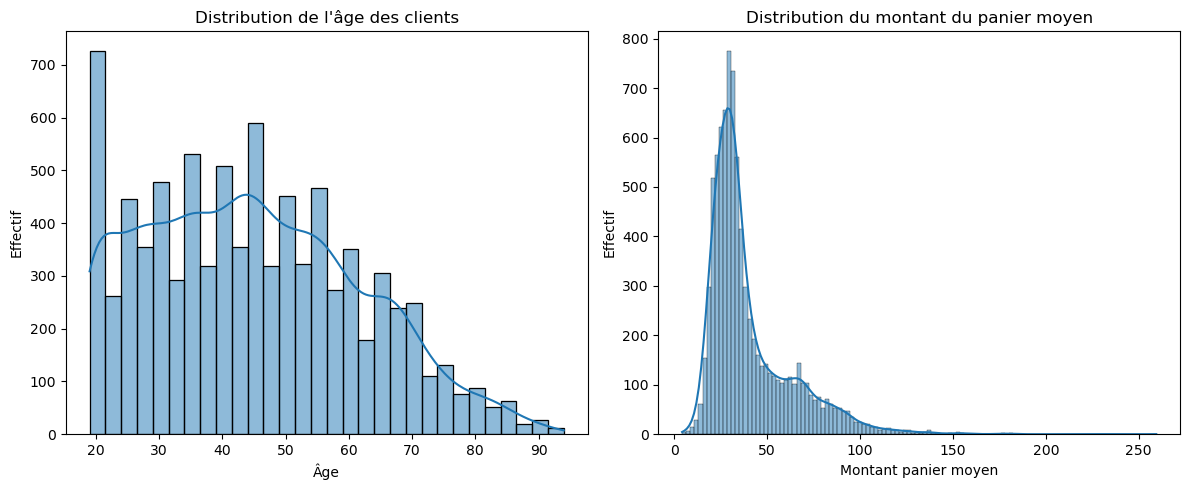

In [255]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(panier_moyen_par_client['age'], kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.subplot(1, 2, 2)
sns.histplot(panier_moyen_par_client['panier_moyen'], kde=True)
plt.title("Distribution du montant du panier moyen")
plt.xlabel("Montant panier moyen")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

**Test de normalité de Shapiro-Wilk**

In [257]:
stat_age, p_age = shapiro(panier_moyen_par_client['age'])
stat_panier, p_panier = shapiro(panier_moyen_par_client['panier_moyen'])
print(f"Test Shapiro-Wilk âge : stat={stat_age:.3f}, p={p_age:.3f}")
print(f"Test Shapiro-Wilk panier moyen : stat={stat_panier:.3f}, p={p_panier:.3f}")

Test Shapiro-Wilk âge : stat=0.970, p=0.000
Test Shapiro-Wilk panier moyen : stat=0.817, p=0.000


C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


**La distribution de l'âge des clients et du montant d'achat moyen réalisés par les clients**

*Le test de Shapiro-Wilk même si il est ici pratiqué sur un échantillon > à 5000 , vient confirmer que la distribution de l'age et des fréquences d'achats des clients représenter sur les 2 histogrammes  n'observent pas la loi normale.*

*De ce fait, il faut utiliser une méthode statistique non paramétrique pour la suite de l'analyse.*

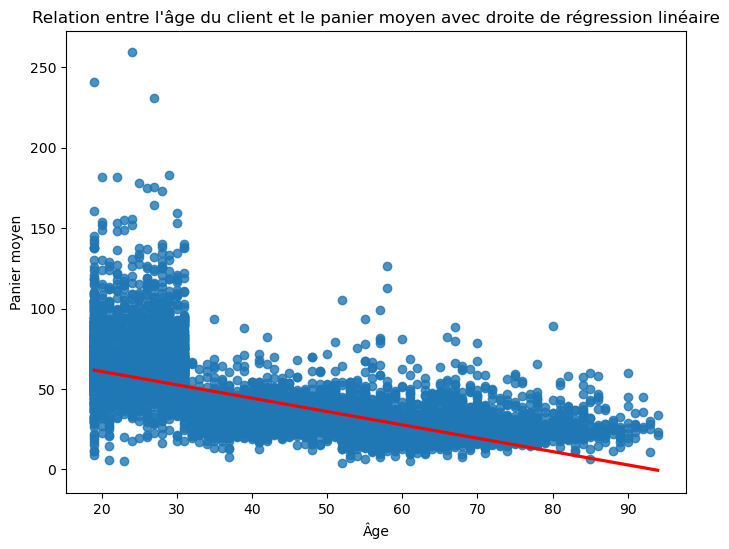

In [259]:
#Représentation en nuage de point de du panier moyen de chaque client en fonction de l'age.
plt.figure(figsize=(8,6))
sns.regplot(data=panier_moyen_par_client, x='age', y='panier_moyen',
            line_kws={'color': 'red'})
plt.title("Relation entre l'âge du client et le panier moyen avec droite de régression linéaire")
plt.xlabel("Âge")
plt.ylabel("Panier moyen")
plt.show()

### **TEST DE SPEARMAN** ##

In [261]:
#Test de Spearman
corr, p_value = spearmanr(panier_moyen_par_client['age'], panier_moyen_par_client['panier_moyen'])
print(f"Coefficient de corrélation de Spearman : {corr:.3f}")
print(f"Valeur p : {p_value:.3f}")

Coefficient de corrélation de Spearman : -0.701
Valeur p : 0.000


*Le coefficient de Spearman de -0.701 indique une corrélation négative forte entre l'âge des clients et le panier moyen, ce qui signifie qu’à mesure que l’âge augmente, le panier moyen a tendance à diminuer de façon monotone.*

*La valeur p proche de 0 confirme que cette relation est statistiquement significative, c’est-à-dire très peu probable d’être due au hasard.*

### **Conclusion:**

*La représentation en nuage de points illustre une tendance claire : plus l’âge des clients est élevé, moins le montant du panier moyen est élevé.* 

*Cette relation inverse est confirmée statistiquement par un coefficient de corrélation de Spearman négatif et significatif (-0.701, p < 0.001).*

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Lien entre l'âge des clients et la catégorie des livres achetés.</h3>
</div>

### **HYPOTHESES:**
**H0 :** L'âge du client et la catégorie de livre acheté sont indépendants.

**H1 :**  L'âge du client et la catégorie de livre acheté ont une dépendance l'un envers l'autre.

### **TYPES DE VARIABLES:**

**Age des clients :**  *Quantitative.*

**Catégorie de livres achetés:** *Qualitative*

In [267]:
#Calcul de l'âge des clients
annee_reference = 2023
df_sans_btob['age'] = annee_reference - df_sans_btob['birth']

### **LA DISTRIBUTION DES DONNEES**

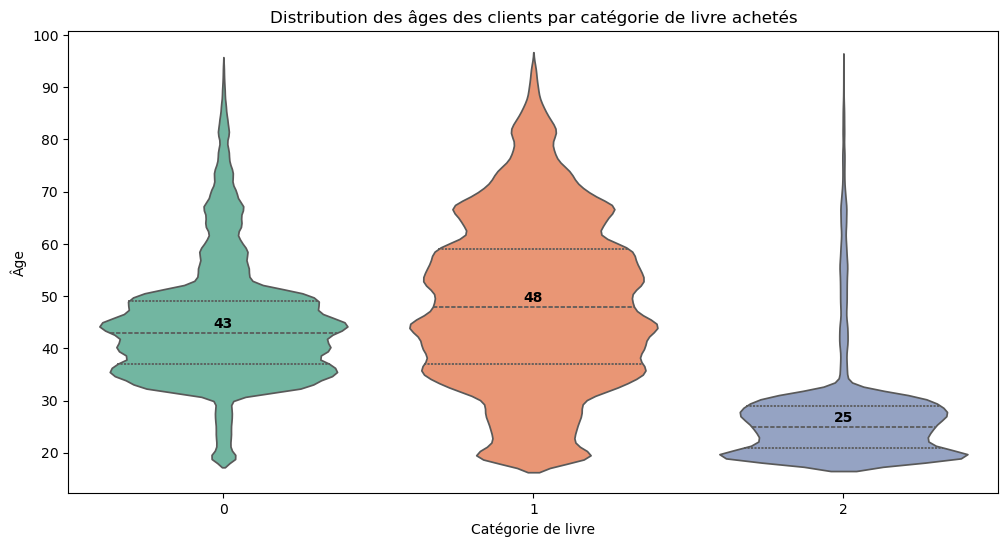

In [269]:
#Graphique en violon de la distribution de l'âge des clients par catégorie de livres achetés.
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", n_colors=df_sans_btob['categ'].nunique())
ax = sns.violinplot(data=df_sans_btob, x='categ', y='age', hue='categ', inner='quartile', palette=palette, legend=False)
plt.title("Distribution des âges des clients par catégorie de livre achetés")
plt.xlabel("Catégorie de livre")
plt.ylabel("Âge")
medians = df_sans_btob.groupby('categ')['age'].median()
for xtick, median in enumerate(medians):
    ax.text(xtick, median + 1, f'{median:.0f}', horizontalalignment='center', color='black', weight='semibold')
plt.show()

## **Interprétation des graphiques** ##

### **Catégorie 0** ###
**Age médian = 43 ans**

*Distribution assez concentrée autour de 35–50 ans, avec quelques clients plus jeunes ou plus âgés.*
*Les âges sont assez uniformément répartis, ce qui montre une clientèle plutôt équilibrée d’adultes.*

### **Catégorie 1** ###

**Age médian = 48 ans**

*Distribution plus étalée : on trouve des clients de tous âges (de 20 à 80 ans).*
*Le cœur de la distribution est autour de 45–60 ans, ce qui suggère que ces livres plaisent surtout aux personnes plus âgées.*

### **Catégorie 2** ###

**Age médian = 25 ans**

*Distribution très resserrée vers le bas, avec une majorité de clients jeunes (20–30 ans).*
*Très peu de clients au-dessus de 40 ans.*

**Test de normalité de Shapiro-Wilk**

In [272]:
for categ, group in df_sans_btob.groupby('categ'):
    stat, p = shapiro(group['age'])
    print(f"Catégorie {categ} : stat={stat:.3f}, p={p:.3f}")

Catégorie 0 : stat=0.935, p=0.000
Catégorie 1 : stat=0.988, p=0.000
Catégorie 2 : stat=0.674, p=0.000


C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 387281.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 220605.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\remym\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32848.
  res = hypotest_fun_out(*samples, **kwds)


**La distribution de l'âge des clients et du montant d'achat moyen réalisés par les clients**

Le test de Shapiro-Wilk même si il est ici pratiqué sur un échantillon > à 5000 , vient confirmer que la distribution des catégorie des livres achetés en fonction de l'age des clients représentés sur les 3 graphiques en violons n'observent pas la loi normale.

De ce fait, il faut utiliser une méthode statistique non paramétrique pour la suite de l'analyse.

**La Variance entre catégories : Test de Levene**

In [275]:
#Importation de la fonction nécessaire au test de Levenne
from scipy.stats import levene
# Préparer la liste des groupes d'âges par catégorie
groupes_age = [df_sans_btob[df_sans_btob['categ'] == cat]['age'] for cat in df_sans_btob['categ'].unique()]
# Effectuer le test de Levene
stat, p_value = levene(*groupes_age)
print(f"Statistique de Levene : {stat:.3f}")
print(f"Valeur p : {p_value:.3f}")
if p_value > 0.05:
    print("Les variances sont homogènes (on ne rejette pas l'hypothèse d'égalité des variances).")
else:
    print("Les variances ne sont pas homogènes (on rejette l'hypothèse d'égalité des variances).")

Statistique de Levene : 24651.780
Valeur p : 0.000
Les variances ne sont pas homogènes (on rejette l'hypothèse d'égalité des variances).


*Le test de Levene indique que les variances d'âges entre les catégories de livres ne sont homogènes.*

*L'hypothèse d'égalité est donc exclue, il faudra comme l'indiquait avant le test de Shapiro-Wilk utiliser un test non paramétrique.*

### **TEST DE KRUSKAL-WALLIS** ###

In [278]:
#Importation du de la fonction nécessaire à la réalistion du test de Kruskal_Wallis
from scipy.stats import kruskal
# Extraire les âges par catégorie dans une liste
groupes_ages = [df_sans_btob.loc[df_sans_btob['categ'] == cat, 'age'] for cat in df_sans_btob['categ'].unique()]
# Effectuer le test de Kruskal-Wallis
stat, p_value = kruskal(*groupes_ages)
print(f"Statistique H : {stat:.3f}")
print(f"Valeur p : {p_value:.3f}")

Statistique H : 71359.734
Valeur p : 0.000


*La statistique H élevée (71359.734) et la p-value très faible (0.000) issues du test de Kruskal-Wallis indiquent qu’il existe une différence statistiquement significative entre au moins deux des groupes de catégorie  de livre*

*La p-value faible rejette H0, ce qui signifie qu'il y a un lien  entre l'age et la catégorie de livres achetés.*


### **TEST POST-HOC DE DUNN** ###

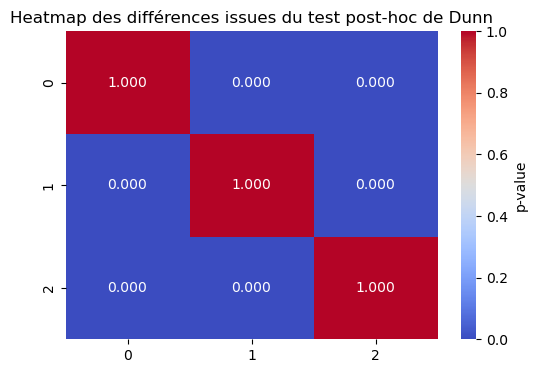

In [281]:
# Réaliser le test post-hoc de Dunn avec correction de Bonferroni
posthoc = sp.posthoc_dunn(df_sans_btob, val_col='age', group_col='categ', p_adjust='bonferroni')
plt.figure(figsize=(6, 4))
sns.heatmap(posthoc, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'p-value'})
plt.title("Heatmap des différences issues du test post-hoc de Dunn")
plt.show()

*Les valeurs représentent les p-values ajustées pour chaque comparaison entre catégories.*

*Si une valeur est < 0.05, la différence entre ces deux groupes est statistiquement significative.*

*Ici, toutes les valeurs sont égales à 0.0 ou 1.0, ce qui signifie :*

* **0.0, il y a une différence significative.**

* **1.0, il n’y a pas de différence significative.**

*Il existe donc des écarts d’âge clairs entre toutes les catégories de livres achetés.*

### **Conclusion:**

*Les différents tests statistiques effectués recoupent la visualisation graphiques des données.*

*Les clients de la catégorie 2 sont nettement plus jeunes, tandis que les catégories 0 et 1 concernent des clients plus âgés.*